# Exploration on how neural network extract relevant information

## What is relevant information

In the field of machine learning, no matter rather the model is built base on discriminative or generative, supervisor or unsupervisor learning, the main factor that affect the model quaility remain the same for all methodologies that rather the learning algo capture any dependence between input data source and target, the dependence here is what refere to relevant information of input source with respect to target. In general, there are 3 types of relevant information can be categorized :

1. Input data with noise - The input signal is corrupted with Nosie which noise is in-relevent

2. Inpute data of several classes - The input signal is belongs to same/different classes of targets, relevance is then refer to different feature that belongs to different classes

3. Mixture of both above.

Due to its importance on the field, several theories are developed to analyze this problem , such as rate distortion theory, minimum description length etc. In this report, it will focus on the aspect of information theory on information bottleneck principle. 

## Information bottleneck principle 
[1] The information bottleneck method 

In a real world setting, the input data that supplied to learning machine usually contain reduantance/noise information that contribuite less to the learning task on hand, in such case, the effective dimension of input with respected to the task on hand is usually smaller than the original one, in order to quanitify this reduction, the IB has introduce Relevant quantization as follow : 

Let
1. $X$ be the set of original input with probability $p(x)$
2. $\hat{X}$ be the compressed representation 

So, the process now become to identify a stochastic mapping from $X$ to $\hat{X}$ in the form of $p(\hat{x}|x)$ where $x\in X$ , $\hat{x}\in\hat{X}$

To give a more intitutive view, let's assume the task on hand is classification and the input $X$ contain 2 classes, the optimal case is to produce 2 different code words from input data $X$ that match with predefined class labels.

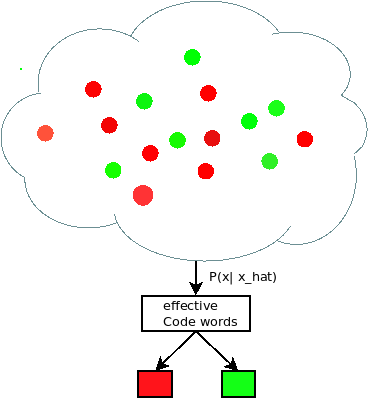


### Average number of partition
In the aspect of IB, the function $p(\hat{x}|x)$ serve as a soft partition over $X$ such that for each $x$ belongs to same class,it will map(partition) to same(or similar) code words in ideal case.

The average number of partition is easy defined as 
$$\text{avg # of partition} = \frac{\text{avg volume}(X)}{\text{avg volume of partition}}$$

where each term is defined as :
$$
\begin{align}
     \text{avg volume}(X) &= 2^{H(X)} \\
                          &= 2^{H(x|\hat{x})}
\end{align}
$$

Both terms are specify in terms of entropy, where the average volume of X is defined as the information contain in $X$ and the average volume of partition is the conditional entropy of $X$ given $\hat{X}$, the uncertainty of $X$ given $\hat{X}$, in simply word, the numbe of ways that $X$ can label depends on the mapping.

In result, the avg number of partition becomes : 

$$ 
\begin{align}
\text{avg of partition} &= \frac{2^{H(X)}}{2^{H(X|\hat{X})}}\\
&= 2^{H(X)-H(X|\hat{X})}
\end{align}
$$

### Mutual Information (MI)
From the above formula, it is shows that the number of partition is depends on the value $H(X)-H(X|\hat{X})$ which is the refere to mutual information($I(X;Y)$) in information theory.

#### General Setting of MI - $I(X;Y)$
The Mutial Information(MI) quantity is defined as a measure on the amount of uncertainity resolved on $X$ after $Y$ is observed, to see this, the value of $H(X)$ represent the prior uncertainity(information) of $X$ while $H(X|Y)$ denote the uncertainity of $X$ remain after $Y$ is observed, so the difference between them is showing the amount of uncertainity on $X$ that the system is resolved after $Y$ is given.[2 NN book]

In the above setting, the quantity of $I(X;Y)$ should be as high as possible because it reflect that the system dose learned something to resolve the uncertainity. However, in the context of IB, it is sightly different which it seeks for min-max relation with addtional constraint.

MI can be also view as KL divergence : 

$$ KLD_{f(x)||f(y)} = \iint_{-\infty}^\infty f_{x,y}(x,y)log\left(\frac{f_{x,y}(x,y)}{f_x(x)f_y(y)}\right)$$

with join distribution $f_{x,y}(x,y)$ and marginal distribution as $f_x(x)$ and $f_y(y)$
As such, the MI between $X$ and $Y$ can also interrupt as KL divergence between the join distribution and product of density function (ie. join vs independent )

#### IB Setting of MI(1) - $I(X;\hat{X})$

In analog to compression problem above, one can think of the stochastic mapping of $\hat{X}$ in the following two cases:
1. Identity mapping - 1 to 1 mapping from $X$ to $\hat{X}$ ,there is no uncertainity remain $\implies H(X|\hat{X})=0 $
2. It maps all $X$ to single code word $\hat{X}$ (ie. N to 1 mapping, maximum uncertainity,  $\implies H(X|\hat{X})\approx H(X) $)

So, the approcah to the efficient code words representation is to find the maximum resolvable uncertainity of $X$ while minimizing the mapping from identity all the way to N to 1 
 
#### IB Setting of MI(2) - $I(Y;\hat{X})$

The above explanation shows the idea behine how $X$ should be reduce to $\hat{X}$, but not related to the task itself. Though, it is easily to come up the same argument as above. Using the MI again with those variables changed to $I(Y;\hat{X})$, in this sense, it demonstrate the information of $Y$ resolved by compressed code words from $X$, in other word, it ensure the mapping should retain relevant information about $Y$ in order for the machine to resolve uncertainity of $Y$

#### Combine both MI $I(X;\hat{X}, I(Y;\hat{X})$

With both terms defined above, it problem now can be treat as finding the optimal partition size(mapping) with constraint on that mapping must retain the require relevant information of $Y$.

The above description can be formulate in terms of variational calculus to minimize the functional : 
$$\text{optimal compression} = min \left(I(X;\hat{X}) - \beta I(Y;\hat{X})\right)$$

The Lagrange multiplier here can be treat as a control parameter on how much relevant information of $Y$ wrt to $\hat{X}$ should be retain while 0 indicate no constraint implied, high value of beta represent requirement on fine grain information is retained.

#### In connection with VC dimension ?
[3 SLT]

In the context of statistical learning theory, the generalization capability of learning algo is detereminated by the function complexity as VC dimension, in the simplest setting, it can be shows as : 

$$\text{VC dim} = \lim\limits_{l \to \infty} \frac{H^{\Lambda}(l)}{l} = 0 $$

where $H^{\Lambda}(l)$ is random entropy of the learning algo with parameter $\Lambda$ and data set $l$, in short, it shows the maximum number of random labeling on the provided data set by the machine. 

example : In the case of binary classification, there are at most $2^l$ possible ways for random labeling, if the machine happen to be so powerful that it can generate any configuration $\Lambda$ to match up the label,in result, the above ratio will goes to infinity in such case and the machine is said to be not generalize well.

It is important to point out that the above ratio quantify generalization property depends on the size of sample, not degree of freedom in the traditional setting.

While the VC dimension working on the sample size, it can be analogy to $H(X)$ as the information size over $X$ and $H(X|\hat{X})$ as the function entropy, but it is not random anymore in contrast to VC dim, so that MI can be an indicator on how well is the function entropy match up with the piror entropy of $X$. 
$$ \text{match up of H(X)} = \frac{H(X)}{H(X|\hat{X})}\\ 
   \text{match up of H(Y)} = \frac{H(Y)}{H(Y|\hat{X})}
$$

However, the problem is that it is distribution dependent.

## Experiement Setting 
In referring to the begining of the report, there are 3 types of relevant information can be classify, the experiement conducted is purpose on the second type which the main task is to distinguish input by identify relevant features.
To examinate on how relevant information is achieved in nerual network,the test has adopted autoencoder in an unsupervised learning manner. The reason on choosing autoencoder as model is due to its celebrity on latent space embedding which is in parallel to the efficient code words above.  

In order to access MI information, the report use NPEET library which is a non-parametric entropy estimation from the following :
https://github.com/gregversteeg/NPEET

### Autoencoder Model

The following model parameters are examinate during the experiment :

|Batch Size|Encoder Layer|Bottleneck feature size|Report|
|:--------:|:-----------:|:---------------------:|:----:|
|  10      |     6       |4,8,10,12,64,128,208.256|Yes|
|  100     |     6       |4,10,12,64,128,208.256|Yes|
|  10      |     3       |4,12|No|
|  10      |   vgg16     |12,256|No|
|  100     |   vgg16     |12,256|No|
|  10      |6(fix filter 3)|12|No|
|  100     |6(fix filter 3)|12|No|

Those models that are not show in the report is due to duplication and some of the result are not match up with the theory , especially for vgg16 encoder model, which the difficulty is that the MI is most of the time negative which is not possible in theory.  

### Data Set
A data set comes with 2,481 diamond arrow image with one image per unique diamond. Those image is solarized with level 0 and brightness adjust with 2, random rotation is applied before input to model.

The data set is choosen specifically because of the inherent similar pattern for each diamond, in terms of SSMI(structure similarility measurement index), the data set shows that the average SSMI is above 95% with the fact that each of the image is from different diamond. In this case, those images help to access the limit of neural nework on information extraction and the behivours on identify relevant information in such extreme case.


Sample Original Image : 

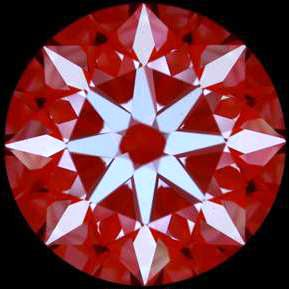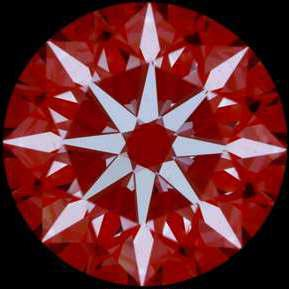

Solarize and Brightness adjusted (SSMI 0.96) : 

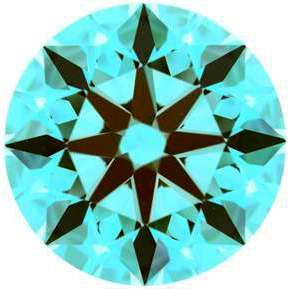
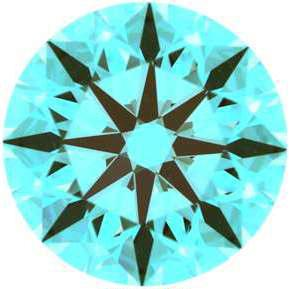

Reconstructed Image : 

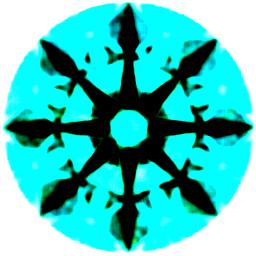
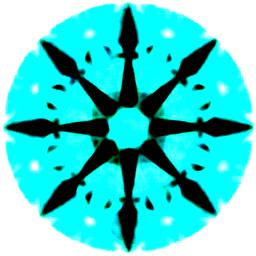


Reconstructed Image with logit applied:

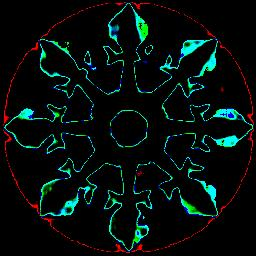
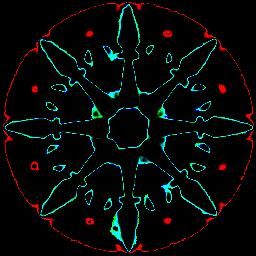

### Data Capture 

Apart from the usual training/reconstruction loss, there are additional data captured for analysis purpose. Those data listed below is capture from the first 50-100 samples during validation phase. 

| Name | description |
|----|-----------|
|$MI(X;Y)$|Although source and target image is the same, however as rotation is applied, it may useful to capture as well.|
|$MI(h_{i-1};h_{i})$|MI of intra-layer|
|$MI(X;C)$|MI between X and bottleneck layer|
|$MI(Y;C)$|MI between Y and bootleneck layer|
|$MI(Y;h)$|MI between Y and each layer|
|4th cumulant of each encoder output| To reflect rather the distribution of output depart from gaussian|
|Eigen values of each encoder weight||
|Eigen values of covariance for each encoder output||

## Analysis

Those expirement results will be grouped by batch size and bottleneck size as follow :

1. Batch size 10 , and 100
2. Small bottleneck (4,8,10,12,64)
3. Large bottleneck (128,208,256)

### Validation Loss(Reconstruction Loss) , MI(X;Y) MI(X;C) and MI(Y;C) Smoothing 0.2

The below plots shows that there is no significant differences on reconstruction loss between small and large bottleneck, however, differences is spotted in between different batch size which batch size 10 is roughtly 0.04 lower then batch size with 100. 

Different behaviour is observed on the mutual information between input and bottleneck layer($MI(X;C)$), however in general, the curve tail off to 0 with starting value range from 0.3 to 0.5 and depends on the batch size and size of bottleneck, the momentum of tail off behave differently. The observation on those difference is listed below : 

|Batch Size| BottleNeck Size| Observation|
|----------|----------------|------------|
|  10      | 4              |converge to 0.25 instead of 0|
|  10      | 10,12          |converge to 0 **before** the validation loss converge to minimum|
|  10      | 64,128,208,256 |converge to 0 **after** the validation loss converge to minimum| 
|  **100** | **All Size**   |converge to 0 **before** the validation loss converge to minimum| 

||  <h3 align="right">Small BottleNeck</h3> ||
|-:|:-----------------:|:----:|
|| 10 Batch Size    |100 Batch Size|
|Validation Loss|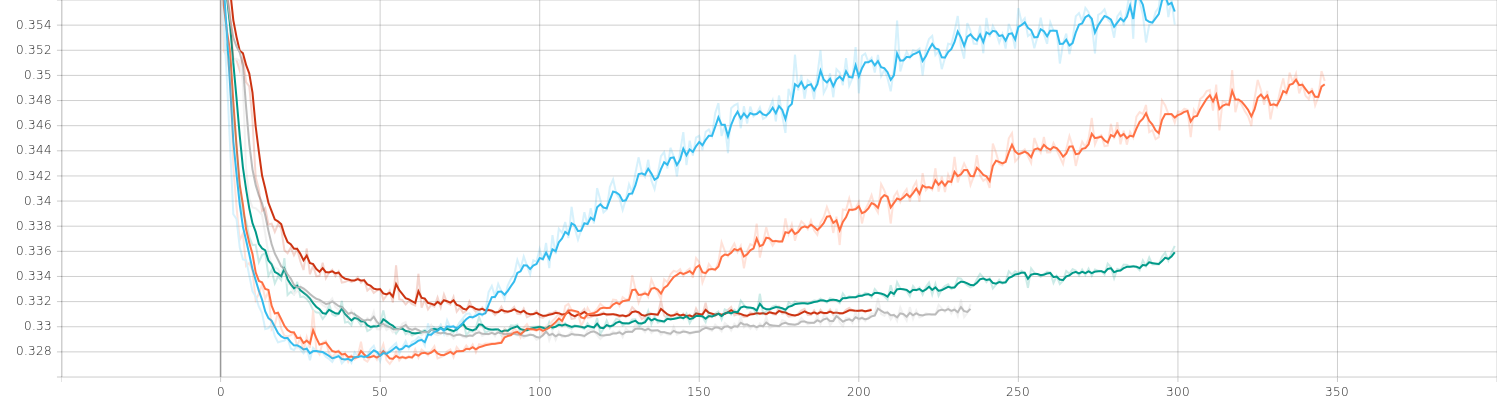|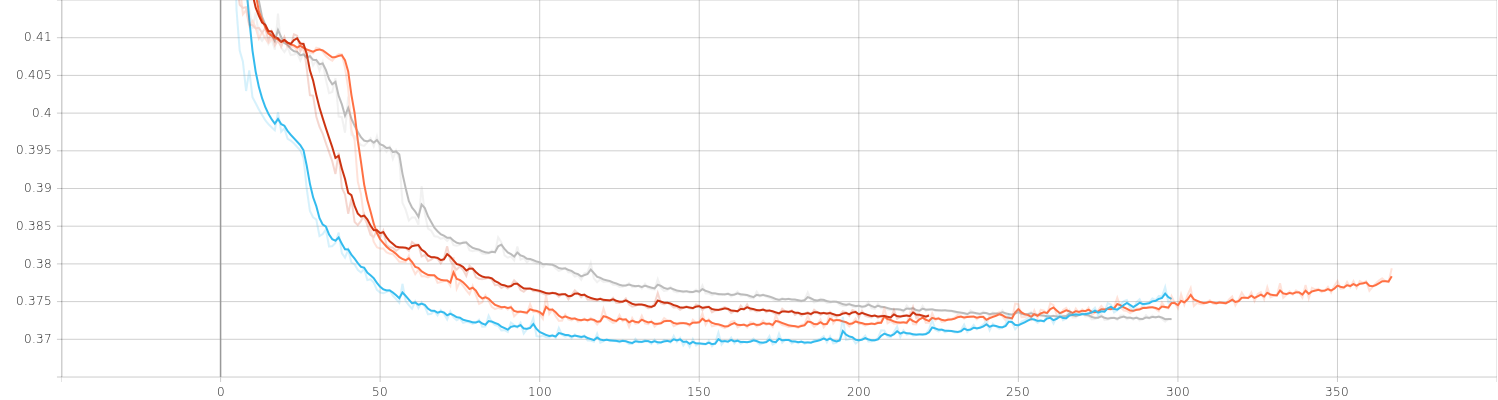|
|MI|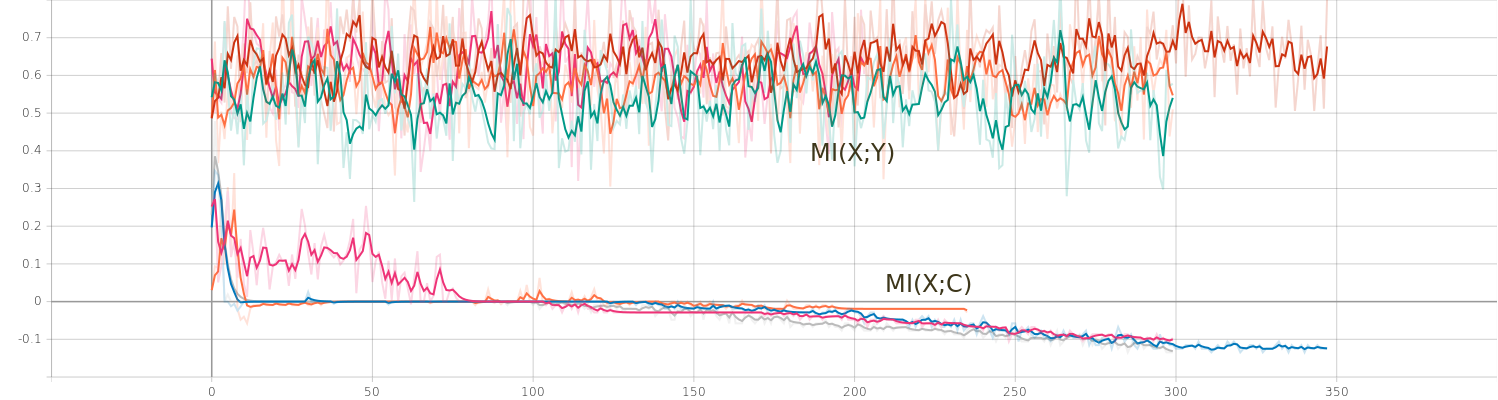|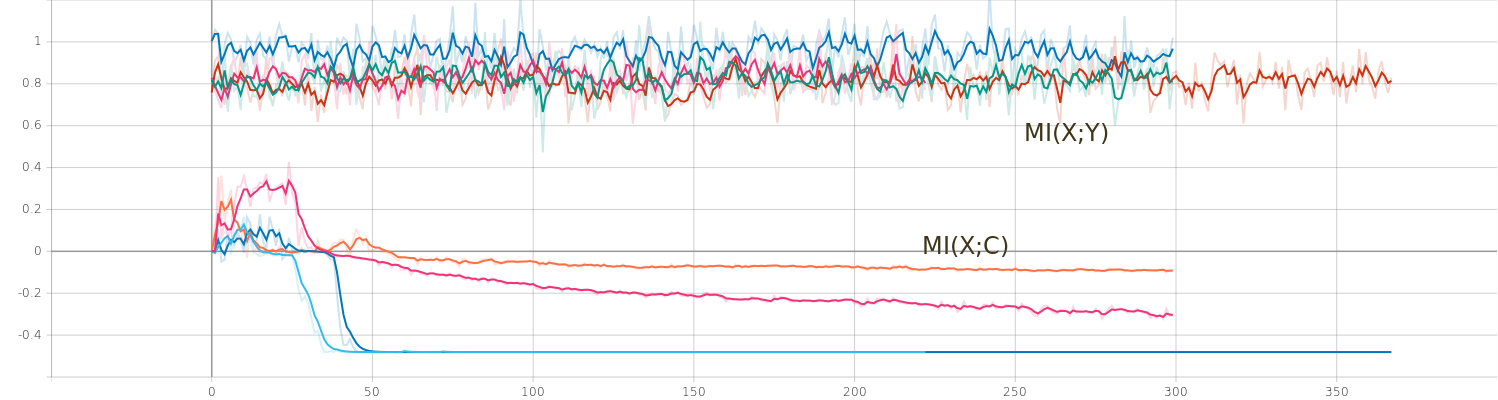|

||  <h3 align="right">Large BottleNeck</h3> ||
|-:|:-----------------:|:----:|
|| 10 Batch Size    |100 Batch Size|
|Validation Loss|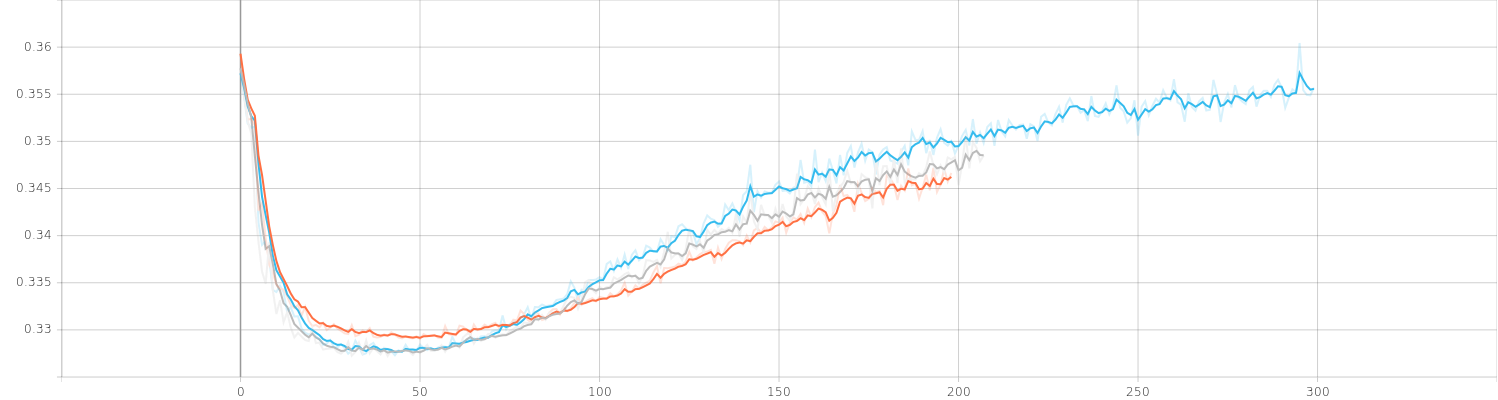|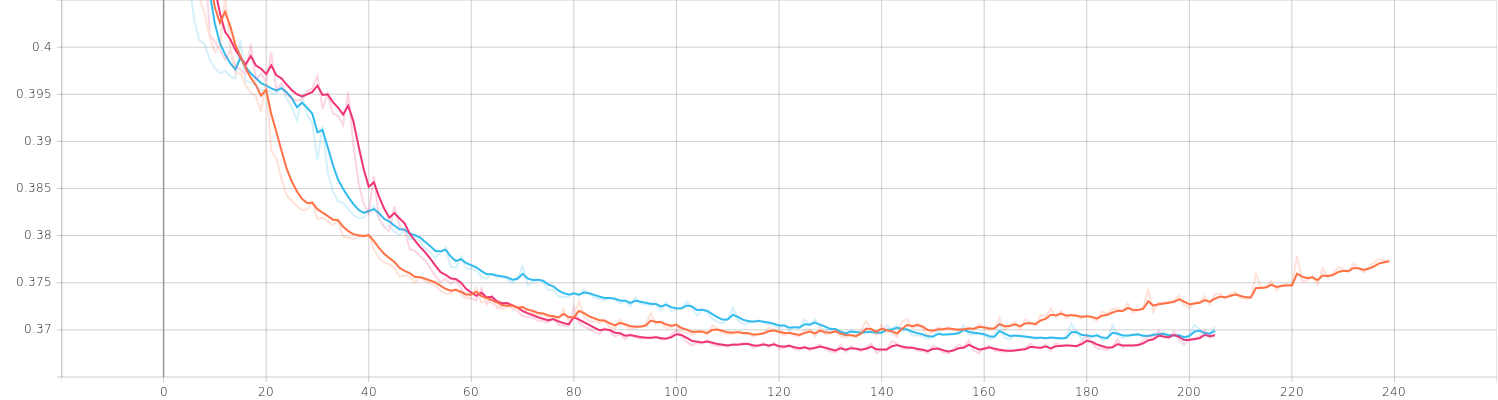|
|MI|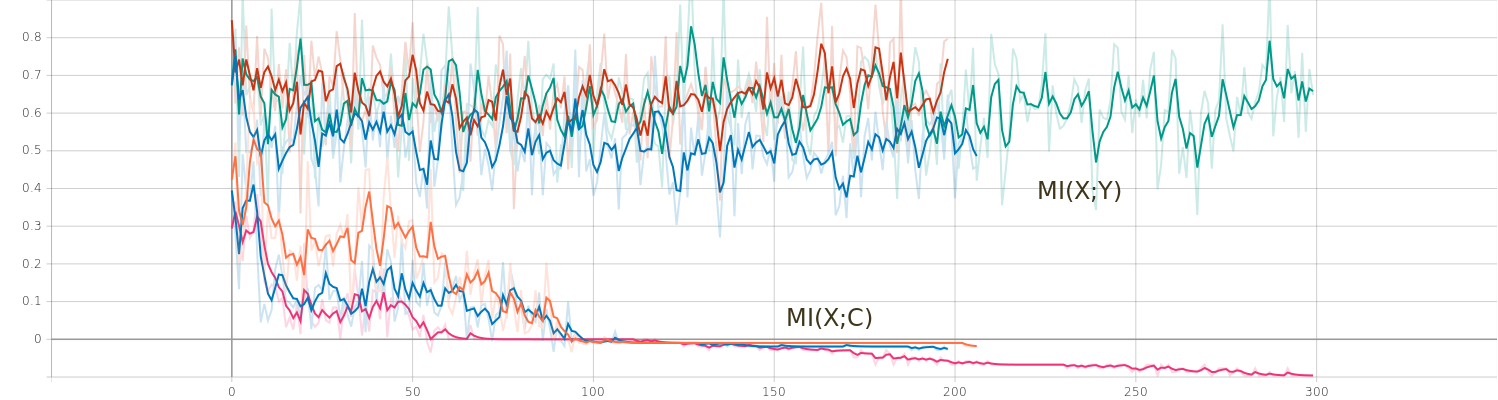|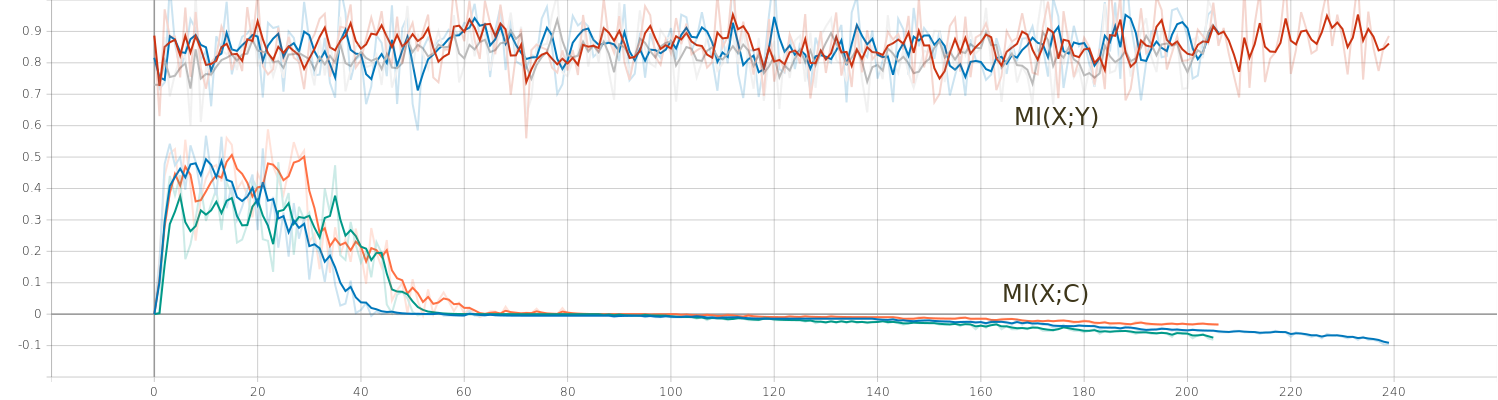|

Following the formula of minimization on functional $MI(X;C)-MI(Y;C)$, it founds that the different appear roughtly in the same pattern for all tests as shows in the below sample reference which the value differences vanish and both curves align together, However, there is a exception with feature size of 4 for batch size of 10 which the difference diverge with epochs as shows below on the right.


||Bottleneck Size 4 , Batch Size 10| Sample Reference |
|-|--------------------------------|------------------|
|MI(X;C)-MI(Y;C)|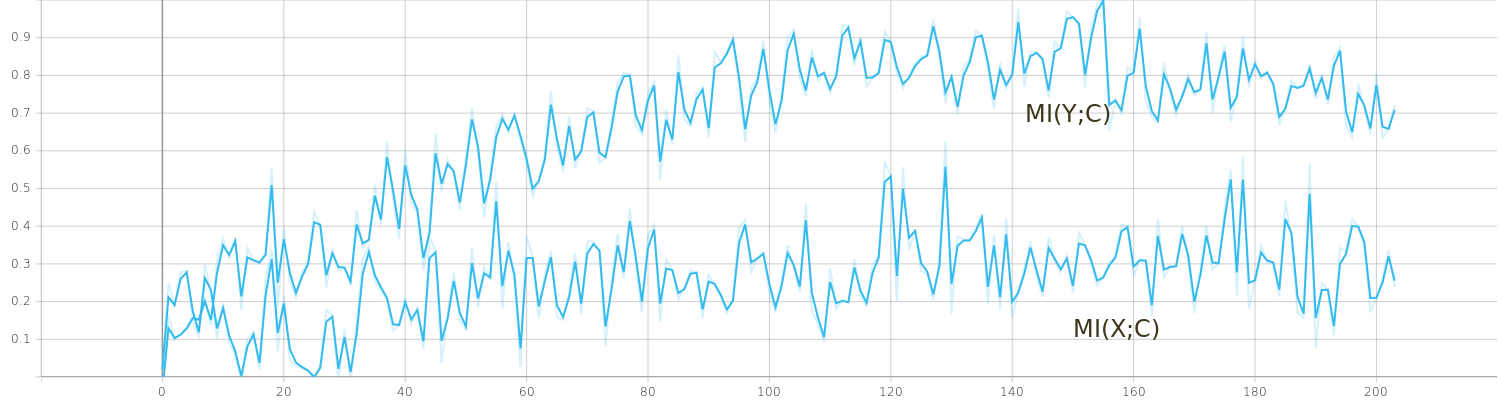|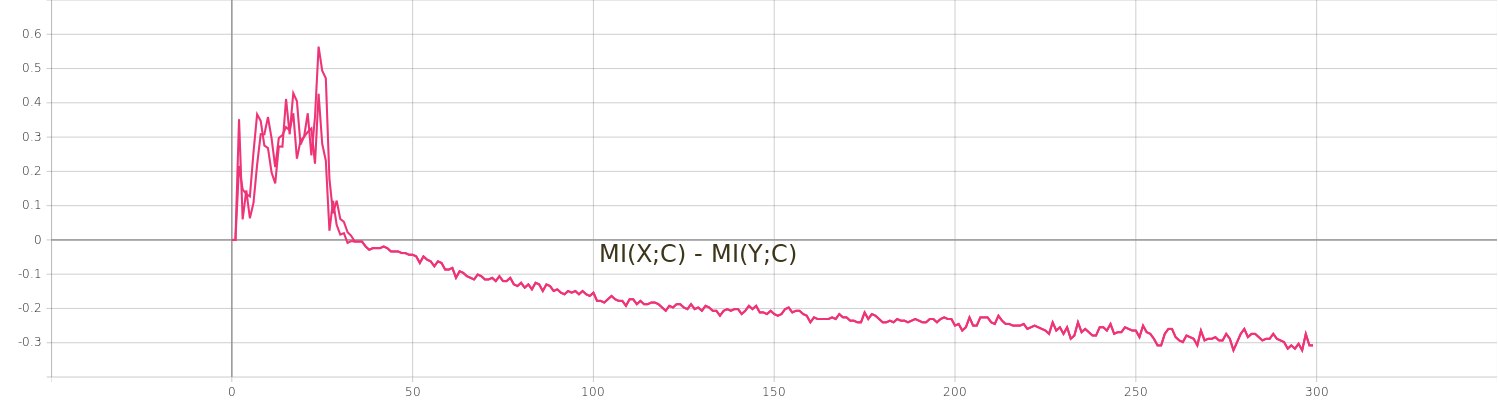|

In summary, all model's data shows evidence that autoencoder follow the IB principle from the functional minimization point of view. The only model with bottleneck size of 4 on batch size 10 shows divergence on the functional may indicate that it may reach capacity limit on capturing information for the reconstruction task. Furthermore, it is the only model that MI(X;C) doesn't converge to 0 which in connection with the VC dimension mention above, it suggest that it may have a finite VC dimension wrt the data set on batch size of 10. On the other hand, the model of size 4 with batch size 100 doesn't show such behaviour which is not making any sense, it need further investigation and study. In also give insight on similar information is sensitive to batch size as well.

It is worth to mention that during the expirement, negative value of MI is encounter over and over again which in theory is not possible. It may due to the collection of data size is small as suggest from the NPEET documentation, however, there is evidence to suggest that the negative value is indicating a overfit is occurs from those curves.

### MI(Y;layers)

Apart from the above observration on bottleneck size, it is also interested in how the nework learn in terms of layer, such as : 
1. Is the network learning information layer by layer ? 
2. Is there any special ordering on layer during the training phase ? 

In order to review those questions and how information is propagate and extract through the network, the MI between target and each layer's output is examinated. The value will be interrupted in the normal sense on how much information of target is resolved base on each layer's of output. The result will focus with batch size of 100 only. 

From the following table,in general, it shows some evidence on small bottleneck size will tend to rely on fine-grained layer in compare to those large size which are seeking information at variate level.

The result has shows that the contribution of layers is not static, each layer's curve swap in and out at different stage. However there is a distinguish between bottleneck size 4 and others : 

1. Bottleneck with size 4 tend to moderate layer by layer and the validation steps is still under convergen.
2. Others are showing a collabrative on layer's effect at the begining of epochs which usually accompany with a very deep slope on validation curve, it suggested the model is in a fast convergence with the help from variate layer's.

Furthermore, it is found that in most cases, deeper layer will have a higher magnitude than fine-grain layers at the early stage with highest rate on convergence, and when the slope start to flatten, part of those MI curves will be zero out and those few remaining is usually retain must information of target.  

It is also interesting to point out that, after the validation loss is stable and start to over fit, it will usually come with a dominant layer.


|Size|Minimum loss step|overfit|layer|Graph/val loss|Filter|
|----|-----------------|----|-----|-----|-|
| 4  | 298(converaging)|No|5,8|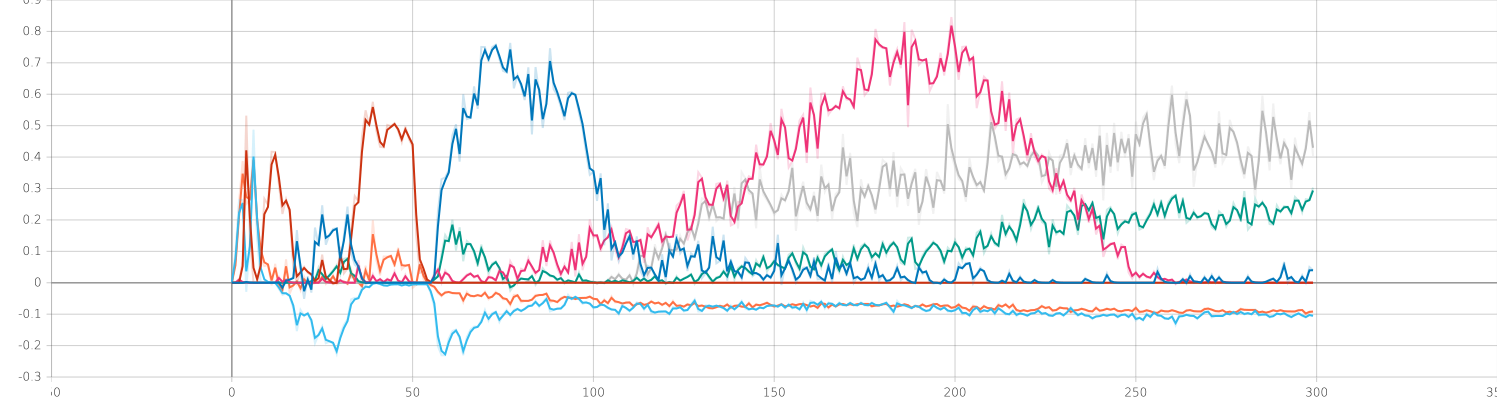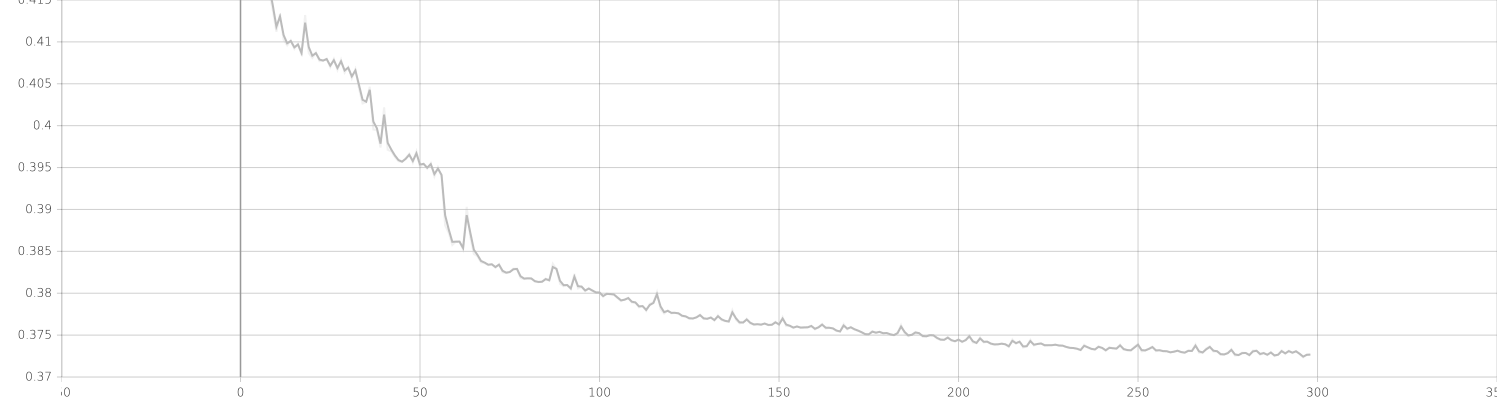|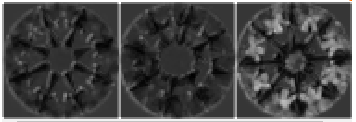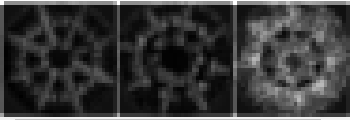|
|12  | 150-200|Yes|2|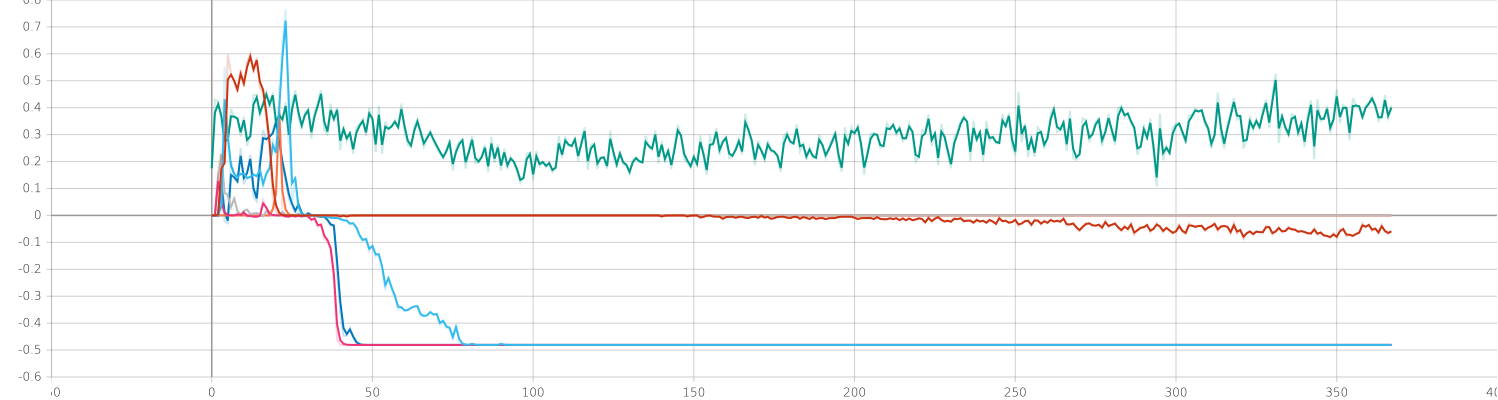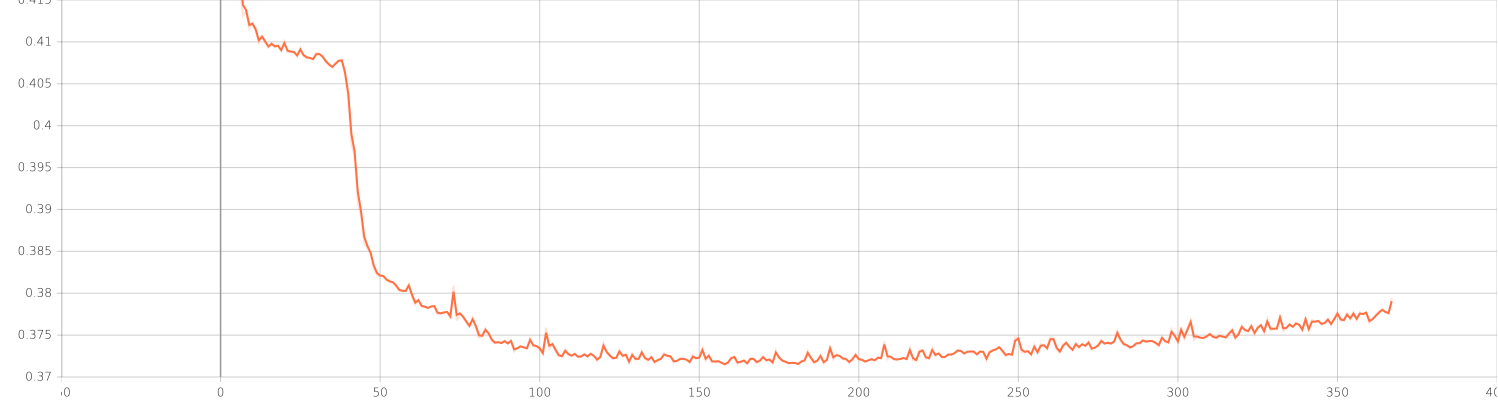|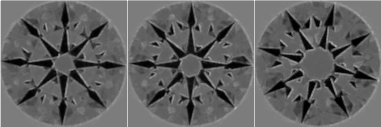|
|64  | 150-170|Yes|2,5|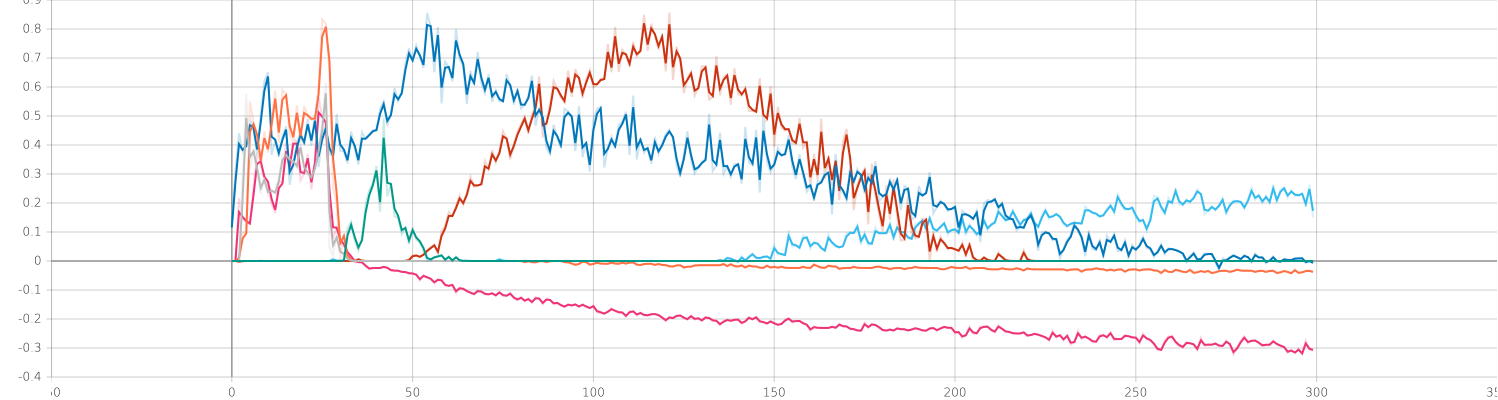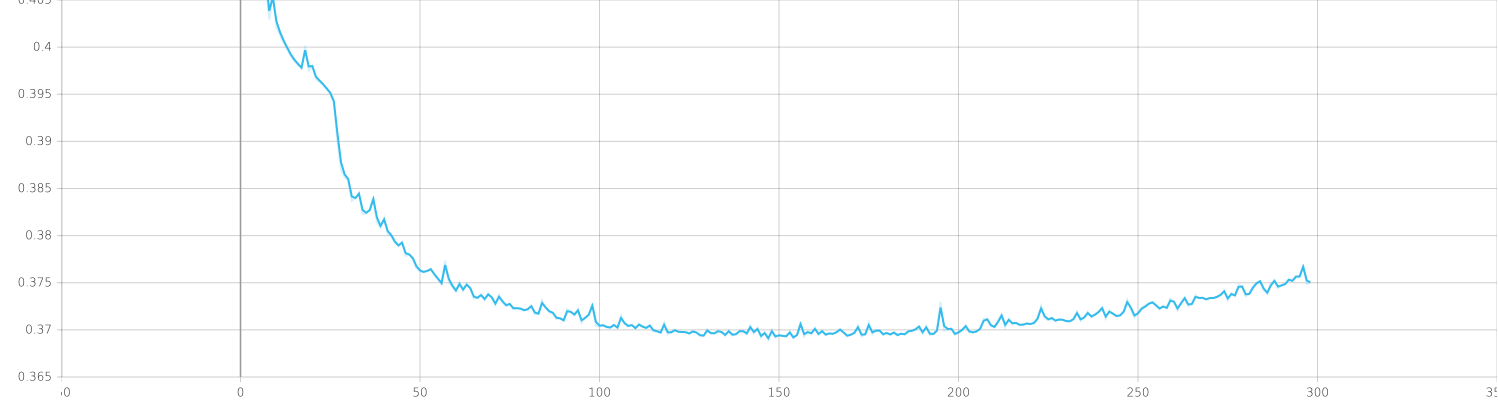|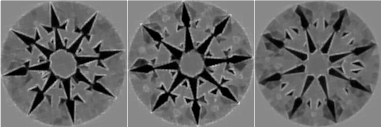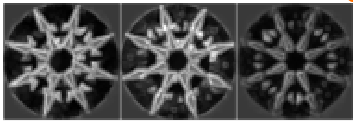|
|128 | ~140 |Yes|11,8|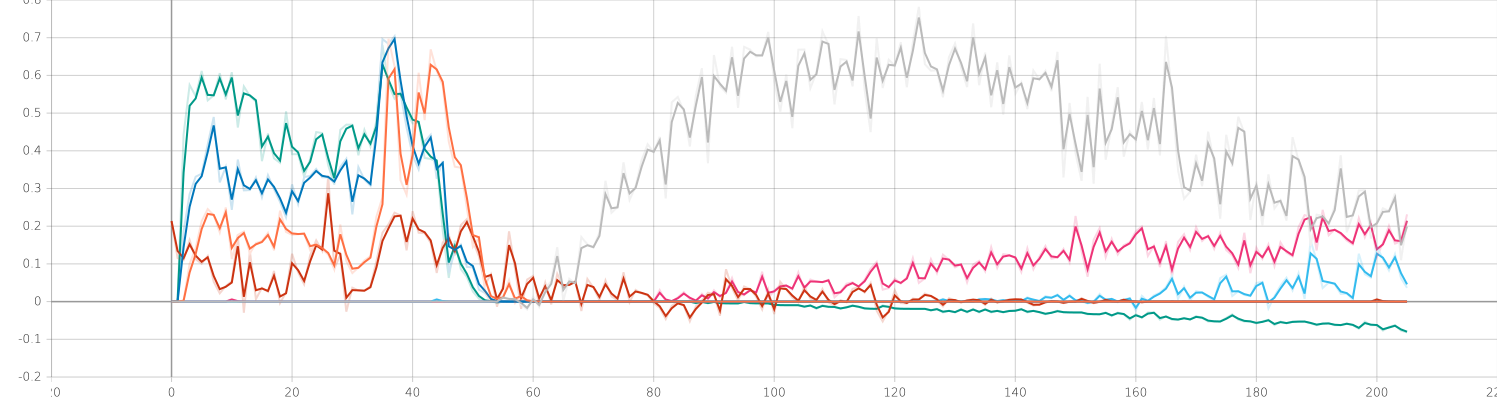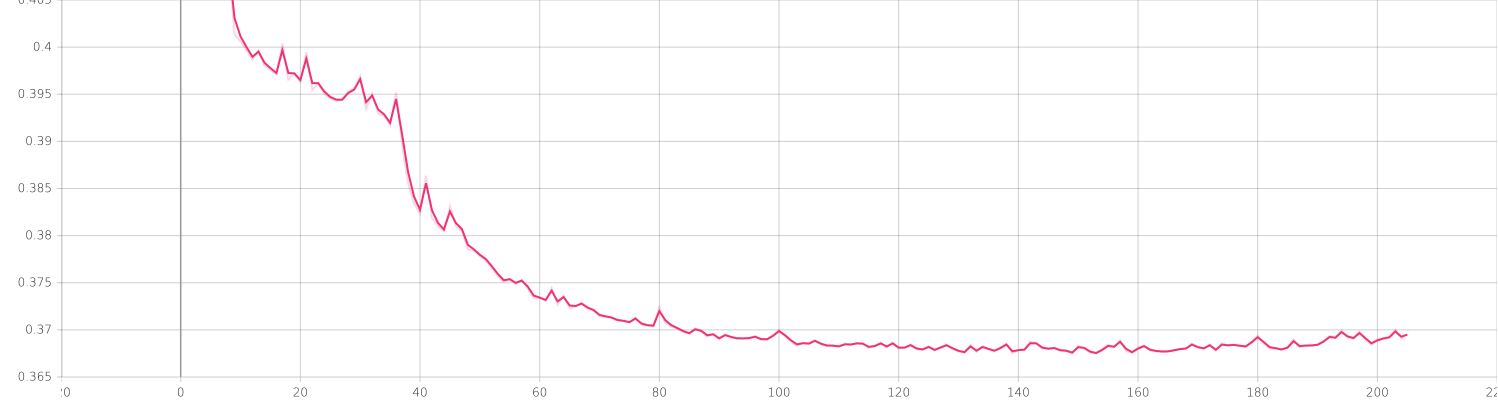|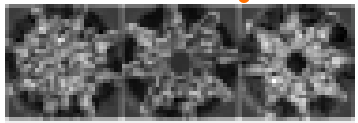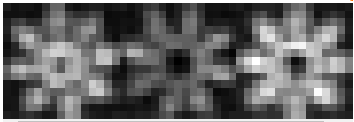|
|208 | ~165 |Yes|?|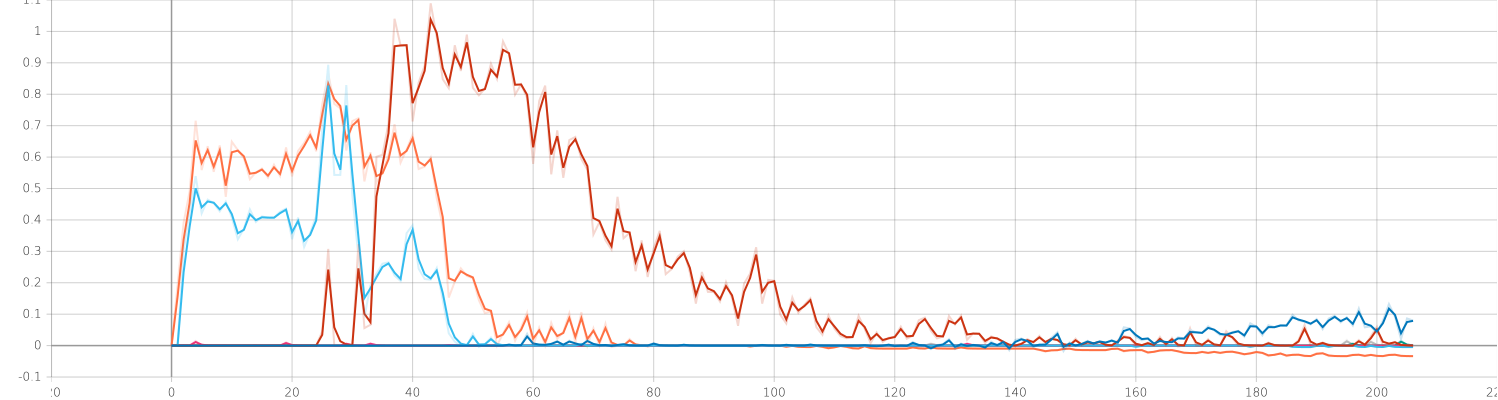|||
|256 | ~124 |Yes|2,5,14|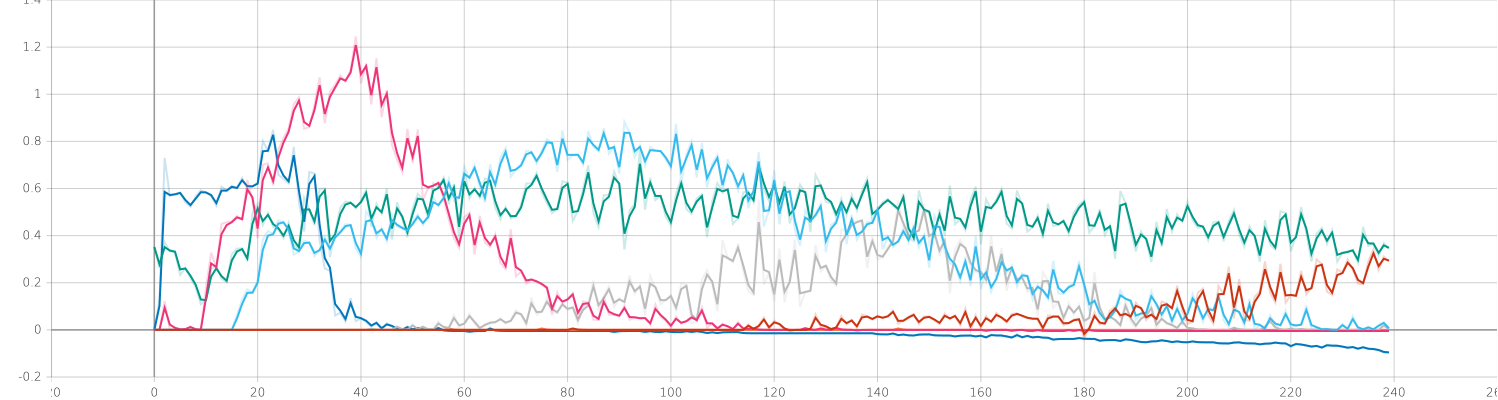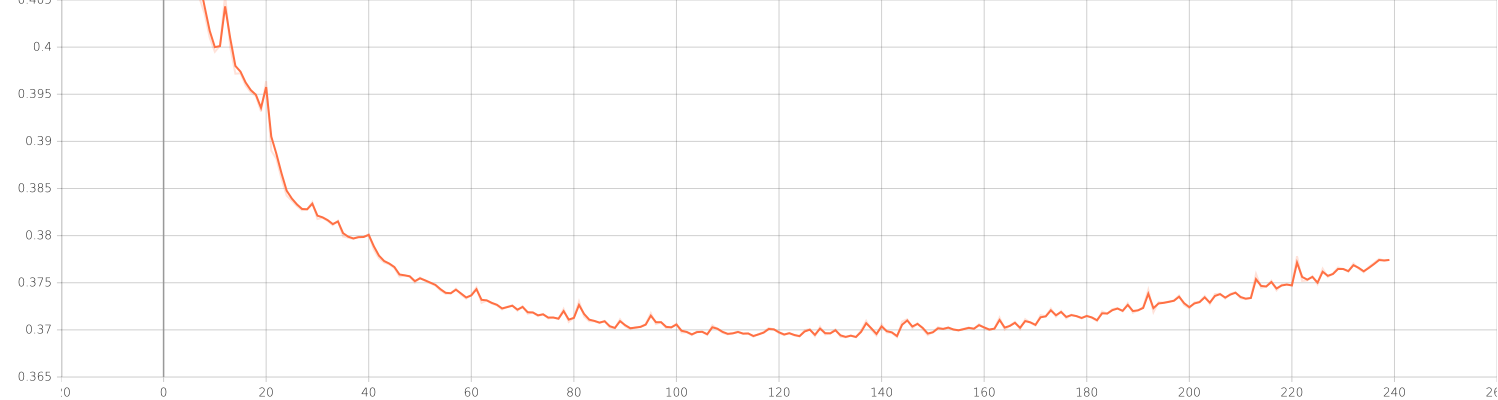|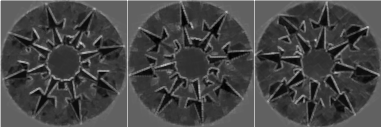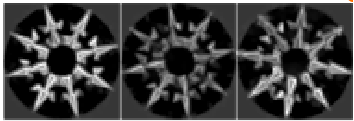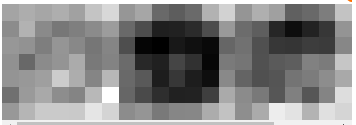|


### Some notes on Filter size of Conv2d layer

The usual setting for autoencoder is that the layer's spatial dimension will reduce layer after layer with increasing filter, the following diagram shows the validation loss with only 1 single layer with variate filter size. The result has shows that the validation loss of filter size over 16 is roughtly the same with 6 layers. It just confirm the universal approximation theorem of neural network. 

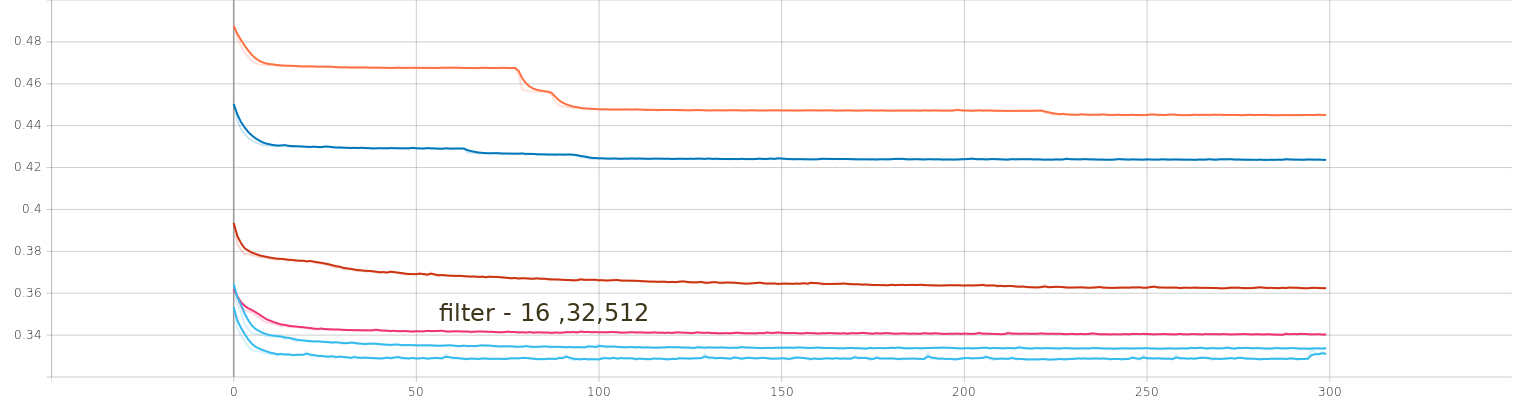

Reference : 

1. The information bottleneck method (arXiv:physics/0004057)https://arxiv.org/abs/physics/0004057
2. Information bottleneck through variational glasses (arXiv:1912.00830) https://arxiv.org/abs/1912.00830
3. Deep Learning and the Information Bottleneck Principle (arXiv:1503.02406) https://arxiv.org/abs/1503.02406
4. Statistical Learning Theory - Vladimir N. Vapnik (A WILEY-INTERSCIENCE PUBLICATION)
5. Neural Networks: A Comprehensive Foundation - Simon Haykin ISBN-13: 978-0132733502